In [1]:
%load_ext autoreload
%autoreload 2

In [28]:
#%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import re
from Color import *

# Matplotlib font configuration
from MatplotlibFonts import *

# Change the font size
rcParams.update({"font.size": 12})

In [19]:
RESULT_DIR='../benchmarks/results'

In [20]:
# Benchmarks in order
Benchmarks = [
    'sha',
    'aes',
    'coremark'
]

# Configurations in order
Configurations = [
    'loop-unroll-1',
    'loop-unroll-2',
    'loop-unroll-4',
    'loop-unroll-6',
    'loop-unroll-8',
    'loop-unroll-10',
    'loop-unroll-15',
    'loop-unroll-20',
    'loop-unroll-25',
    'loop-unroll-30',
    'loop-unroll-35',
]
from BenchmarkConfiguration import *

In [21]:
# Load the benchmarks
def load_benchmark(bench):
    file = RESULT_DIR + '/raw/' + bench + '-results-table-raw.csv'
    return pd.read_csv(file).set_index('Configuration').loc[Configurations]

df = {}
for bench in Benchmarks:
    df[bench] = load_benchmark(bench)

In [22]:
df['aes']['IR-checkpoints']

Configuration
loop-unroll-1     3741
loop-unroll-2     1382
loop-unroll-4     1024
loop-unroll-6     1024
loop-unroll-8     1024
loop-unroll-10    1024
loop-unroll-15    1024
loop-unroll-20    1042
loop-unroll-25    1024
loop-unroll-30    1024
loop-unroll-35    1024
Name: IR-checkpoints, dtype: int64

In [23]:
# Reindex to unroll numbers
dfp = {}
dfp['Cycles'] = pd.DataFrame()
dfp['Checkpoints'] = pd.DataFrame()
dfp['IR-checkpoints'] = pd.DataFrame()
dfp['Spill-checkpoints'] = pd.DataFrame()

for bench in Benchmarks:
    dfp['Cycles'][bench] = df[bench]['Cycles']/df[bench]['Cycles']['loop-unroll-1']*100
    dfp['Checkpoints'][bench] = df[bench]['Checkpoints']/df[bench]['Checkpoints']['loop-unroll-1']*100
    dfp['IR-checkpoints'][bench] = df[bench]['IR-checkpoints']/df[bench]['Checkpoints']['loop-unroll-1']*100
    dfp['Spill-checkpoints'][bench] = df[bench]['Spill-checkpoints']/df[bench]['Checkpoints']['loop-unroll-1']*100

In [24]:
indexmap = {}
for config in Configurations:
    indexmap[config] = int(re.search('loop-unroll-(.+)', config)[1])

dfp['Cycles'].rename(index=indexmap, inplace=True)
dfp['Checkpoints'].rename(index=indexmap, inplace=True)
dfp['IR-checkpoints'].rename(index=indexmap, inplace=True)
dfp['Spill-checkpoints'].rename(index=indexmap, inplace=True)

In [25]:
# For the mean lines
dfp['CyclesMean'] = dfp['Cycles'].T.mean()
dfp['CheckpointsMean'] = dfp['Checkpoints'].T.mean()
dfp['IR-checkpointsMean'] = dfp['IR-checkpoints'].T.mean()
dfp['Spill-checkpointsMean'] = dfp['Spill-checkpoints'].T.mean()

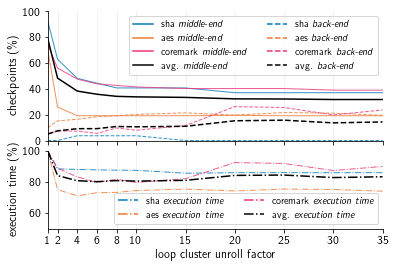

In [46]:
#fig, ax1 = plt.subplots( figsize=(6,4))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,4), gridspec_kw={'height_ratios': [5, 3]})
plt.subplots_adjust(hspace=0.1)


colors = [Color['blue'], Color['orange'], Color['magenta']]

# Make better labels
labels = []
for config in Configurations:
    labels.append(int(re.search('loop-unroll-(.+)', config)[1]))

linewidth = 1
markersize = 5
alpha=0.8
#dfp['Checkpoints'].plot(ax=ax1, linestyle='dashed', marker='x', markersize=markersize, linewidth=linewidth, color=colors, legend=None)
dfp['IR-checkpoints'].plot(ax=ax1, linestyle='solid', alpha=alpha, linewidth=linewidth, color=colors, legend=None)
dfp['Spill-checkpoints'].plot(ax=ax1, linestyle='dashed', alpha=alpha, linewidth=linewidth, color=colors, legend=None)

dfp['IR-checkpointsMean'].plot(ax=ax1, color='black', linestyle='solid', legend=None)
dfp['Spill-checkpointsMean'].plot(ax=ax1, color='black', linestyle='dashed', legend=None)

ax1.set_ylim(0,100)


dfp['Cycles'].plot(ax=ax2, linestyle='dashdot', alpha=alpha, linewidth=linewidth, color=colors, legend=None)
dfp['CyclesMean'].plot(ax=ax2, linestyle='dashdot', color='black', legend=None)
ax2.set_ylim(50, 100)

ytics = np.arange(0, 100, 10)

ax1.set_xlim(1,35)
ax1.set_xticks(labels)
ax1.minorticks_off()

ax1.grid(axis="x", alpha=0.2)
ax2.grid(axis="x", alpha=0.2)

#ax1.xaxis.set_tick_params(which='both', labelbottom=True)

# Build the legend
handles = []
for idx, bench in enumerate(Benchmarks):
    handles.append(Line2D([], [], color=colors[idx], linestyle='solid', label=bench+' \\textit{middle-end}'))
handles.append(Line2D([], [], color='black', linestyle='solid', label='avg. \\textit{middle-end}'))

for idx, bench in enumerate(Benchmarks):
    handles.append(Line2D([], [], color=colors[idx], linestyle='dashed', label=bench+' \\textit{back-end}'))
handles.append(Line2D([], [], color='black', linestyle='dashed', label='avg. \\textit{back-end}'))


#ax1.legend(handles=handles, bbox_to_anchor=(0, 1.0, 1, 0), loc="lower left", mode='expand', ncol=4)
ax1.legend(handles=handles, ncol=2, loc="upper right", fontsize=10)

handles = []
for idx, bench in enumerate(Benchmarks):
    handles.append(Line2D([], [], color=colors[idx], linestyle='dashdot', label=bench+' \\textit{execution time}'))
handles.append(Line2D([], [], color='black', linestyle='dashdot', label='avg. \\textit{execution time}'))
ax2.legend(handles=handles, ncol=2, loc="lower right", fontsize=10)

# Hide the right and top spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Add the labels    
plt.xlabel('loop cluster unroll factor')
ax1.set_ylabel('checkpoints (\%)')
ax2.set_ylabel('execution time (\%)')

plt.show()

In [41]:
# Save the figure
fig.savefig('plots/benchmark-unroll-effect.pdf', bbox_inches='tight')

First step: 30.638146491444232
Est. total loop checkpoints: 61.276292982888464
Est. base checkpoint cost: 17.56939227463151


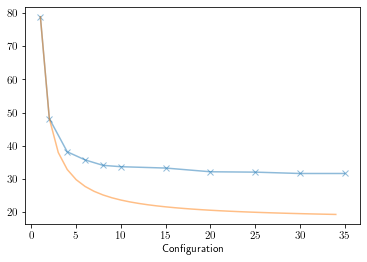

In [571]:
Entry='IR-checkpointsMean'

first_step = dfp[Entry][1]-dfp[Entry][2]
print('First step:',first_step)

# Guess the total loop checkpoints
TotalLoopCP = 2*first_step
BaseCostCP =  dfp[Entry][1]-TotalLoopCP
print('Est. total loop checkpoints:', TotalLoopCP)
print('Est. base checkpoint cost:', BaseCostCP)

L = []
for i in range(1,35):
    C = TotalLoopCP/(i)
    L.append(C+BaseCostCP)

fig, ax = plt.subplots()

dfp[Entry].plot(ax=ax, alpha=0.5, marker='x')
ax.plot(range(1,len(L)+1), L, alpha=0.5)


In [548]:
L[3]

56.35145730554257

In [521]:
dfp['CyclesMean'][4]

80.68512314560694

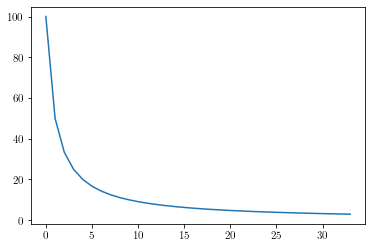

In [455]:
W = 100

L = []
for i in range(1,35):
    C = W/i
    #print('Unroll',i, 'has:', C)
    L.append(C)

fig, ax = plt.subplots()
ax.plot(L)